In [8]:
import pandas as pd
df=pd.read_csv("C:/Users/wahid/PycharmProjects/code-review-server/data/testTrainingData.csv")
df['class'] = [0 if x == 'nu' else 1 for x in df['class']]
df['RE'] = [x / 100 for x in df['RE']]
df['RENL']=[x / 100 for x in df['RENL']]
df=df.dropna()

In [9]:
X = df.drop(['class','id'],axis=1)
y = df['class']

In [5]:
#Random Forest Based Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pickle
accList=[]
for i in range(0,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,random_state=42)
    classifier_rf = RandomForestClassifier(n_estimators=2000,random_state=42)
    classifier_rf.fit(X_train, y_train)
    y_pred = classifier_rf.predict(X_test)
    accScore=accuracy_score(y_test, y_pred)
    accList.append(accScore)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))
accuracy=(sum(accList)/len(accList))*100
print(accuracy)

[[ 98  53]
 [ 80 149]]
              precision    recall  f1-score   support

           0     0.5506    0.6490    0.5957       151
           1     0.7376    0.6507    0.6914       229

    accuracy                         0.6500       380
   macro avg     0.6441    0.6498    0.6436       380
weighted avg     0.6633    0.6500    0.6534       380

65.0


In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegressionCV
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,random_state=42)
LrClf = LogisticRegressionCV(cv=10,solver='liblinear',random_state=0).fit(X, y)
LrClf.score(X, y)

In [ ]:
p_pred = LrClf.predict_proba(X)
y_pred = LrClf.predict(X)
score_ = LrClf.score(X, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred,digits=4)
print(conf_m)
print(report)

In [ ]:
# Naive Bayes Model
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,random_state=42)
NbClf = CategoricalNB()
NbClf.fit(X_train, y_train)
y_prediction=NbClf.predict(X_test)
cm = confusion_matrix(y_test, y_prediction)
clf=classification_report(y_test,y_prediction,digits=4)

In [14]:
#Statistical Significance Test Using Kruskal wallis test
from scipy import stats
usefulClass=[]
nonUsefulClass=[]
for index,row in df.iterrows():
    if df['class'][index]==1:
        usefulClass.append(df['Sentiment'][index])
    else: nonUsefulClass.append(df['Sentiment'][index])
stats.kruskal(usefulClass, nonUsefulClass)

KruskalResult(statistic=0.0033148724973901026, pvalue=0.9540872199642344)

<BarContainer object of 16 artists>

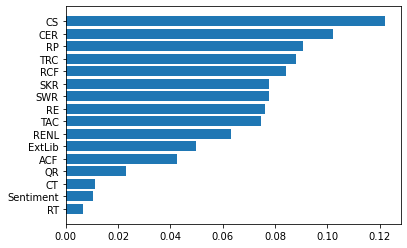

In [45]:
#Random Forest based features Important analysis
import matplotlib.pyplot as plt
featureList=df.keys()
featureList=featureList.drop(['class','id'])
sorted_idx=classifier_rf.feature_importances_.argsort()
plt.barh(featureList.values[sorted_idx], classifier_rf.feature_importances_[sorted_idx])

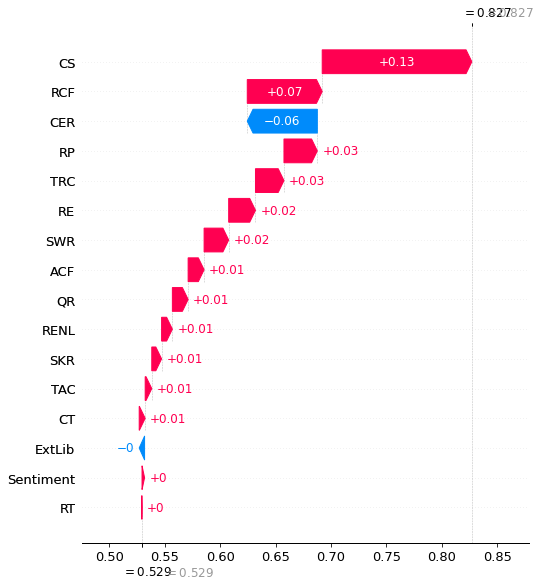

In [46]:
#Shap based features Important analysis
import shap
explainer = shap.Explainer(classifier_rf)
rf_shap_values = explainer.shap_values(X_train, approximate=False, check_additivity=False)
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], rf_shap_values[1][1], feature_names=X_train.columns.to_list(),
max_display=20, show=True )

In [ ]:
len(rf_shap_values[1])

In [ ]:
shap_vals = explainer.shap_values(X_train.iloc[377])

In [ ]:
print("Base Value : ", explainer.expected_value)

In [ ]:
print("Prediction From Adding SHAP Values to Base Value : ", sum(shap_vals[0]))

In [ ]:
sum(rf_shap_values[1][1])+explainer.expected_value[1]

In [ ]:
class ShapObject:

    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names


shap_object = ShapObject(values = explainer.shap_values(X_train)[1][5,:],
                         base_values = explainer.expected_value[1],
                         feature_names = X_train.columns,
                         data = X_train.iloc[5,:])
shap.waterfall_plot(shap_object,max_display=16)

<class 'pandas.core.series.Series'>
